<h2>Import Librares <h2>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

<h2>Load Graph<h2>

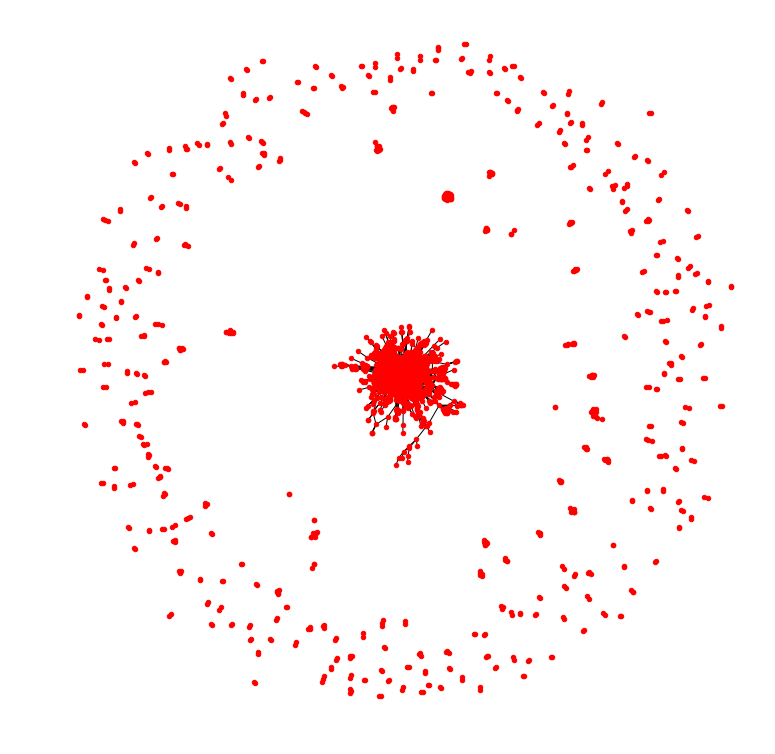

In [4]:
# # G_fb = nx.read_edgelist("facebook_combined.txt")
G_fb = nx.read_weighted_edgelist("h2.txt", delimiter=' ')
plt.figure(figsize=(10,10))
nx.draw(G_fb,node_size = 20,with_labels = False)
plt.show()

<h2>Statistics<h2>

In [34]:
print("Network Diameter: ",diameterNet(G_fb))

Found infinite path length because the graph is not connected
('Network Diameter: ', None)


In [32]:
import pandas as pd
import numpy as np
import operator

def diameterNet(G_fb):
    try:
        nx.diameter(G_fb)
    except:
        print ("Found infinite path length because the graph is not connected")

bc = nx.betweenness_centrality(G_fb, k=None, normalized=True, weight=None, endpoints=False, seed=None)
sorted_x = sorted(bc.items(), key=operator.itemgetter(1))
df = pd.DataFrame(data=sorted_x[-11:-1][::-1],columns=['Node ID', 'Betweenness Value'])

cc = nx.closeness_centrality(G_fb, u=None, distance=None)
sorted_x = sorted(cc.items(), key=operator.itemgetter(1))
df2 = pd.DataFrame(data=sorted_x[-11:-1][::-1],columns=['Node ID', 'Closness Cnetrality Value'])

dc = nx.degree_centrality(G_fb)
sorted_x = sorted(dc.items(), key=operator.itemgetter(1))
df3 = pd.DataFrame(data=sorted_x[-11:-1][::-1],columns=['Node ID', 'Degree Centality Value'])

data = {
    'Measures': ["Density", "Average clustering", "Degree assortative coeff", 
                 "Number of connected components","Average Clustering","Number Of Connected Components"], 
    'Values': [nx.density(G_fb), nx.average_clustering(G_fb), nx.degree_assortativity_coefficient(G_fb), 
               nx.number_connected_components(G_fb),nx.average_clustering(G_fb),nx.number_connected_components(G_fb)]
}
df4 = pd.DataFrame.from_dict(data)
df4

display_side_by_side(df,df2,df3,df4)

,Node ID,Betweenness Value
0,56151,0.123980
1,45848,0.073464
2,339878,0.024103
3,176965,0.020255
4,31483,0.019076
5,4807,0.018650
6,33070,0.018007
7,2977,0.016341
8,11981,0.013531
9,23364,0.013372


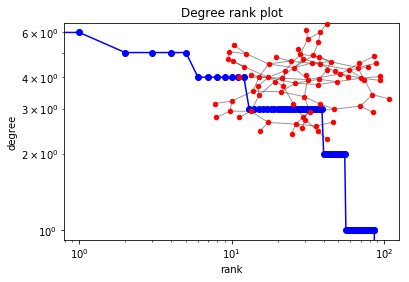

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.gnp_random_graph(100, 0.02)

degree_sequence=sorted([d for n,d in G.degree()],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

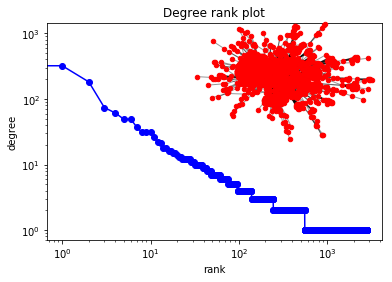

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
G = G_fb

degree_sequence=sorted([d for n,d in G.degree()],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.axes([0.45,0.45,0.45,0.45])
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0]
pos=nx.spring_layout(Gcc)
plt.axis('off')
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

plt.savefig("degree_histogram.png")
plt.show()

<h2>Comparison with Random Graph<h2>

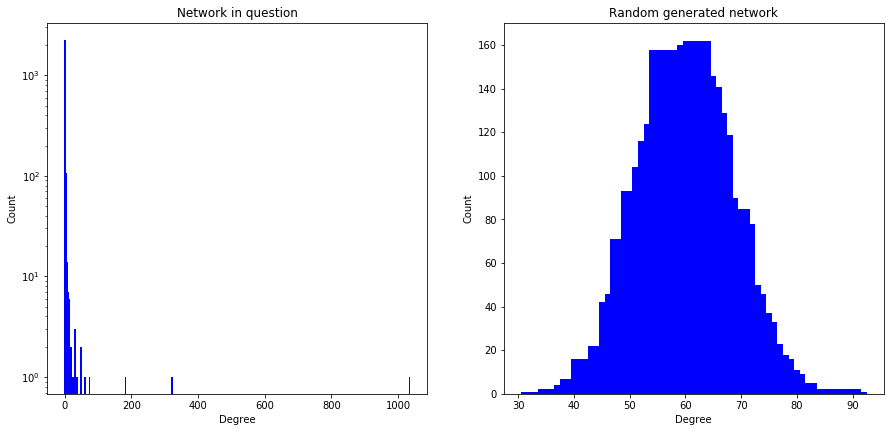

In [8]:
import collections
# G = nx.gnp_random_graph(100, 0.02)
G = G_fb

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,15))
# fig, ax = plt.subplots()
plt.subplot(2, 2, 1)
plt.bar(deg, cnt, width=5, color='b')
plt.title("Network in question")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.yscale('log')
# plt.xscale('log')


G = nx.gnp_random_graph(3000, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


# fig, ax = plt.subplots()
plt.subplot(2, 2, 2)
plt.bar(deg, cnt, width=5, color='b')
plt.title("Random generated network")
plt.ylabel("Count")
plt.xlabel("Degree")
# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [19]:
print("Network Diameter: ",diameterNet(G))

3

In [29]:
def diameterNet(G_fb):
    try:
        nx.diameter(G_fb)
    except:
        print ("Found infinite path length because the graph is not connected")


In [30]:
diameterNet(G_fb)

Found infinite path length because the graph is not connected


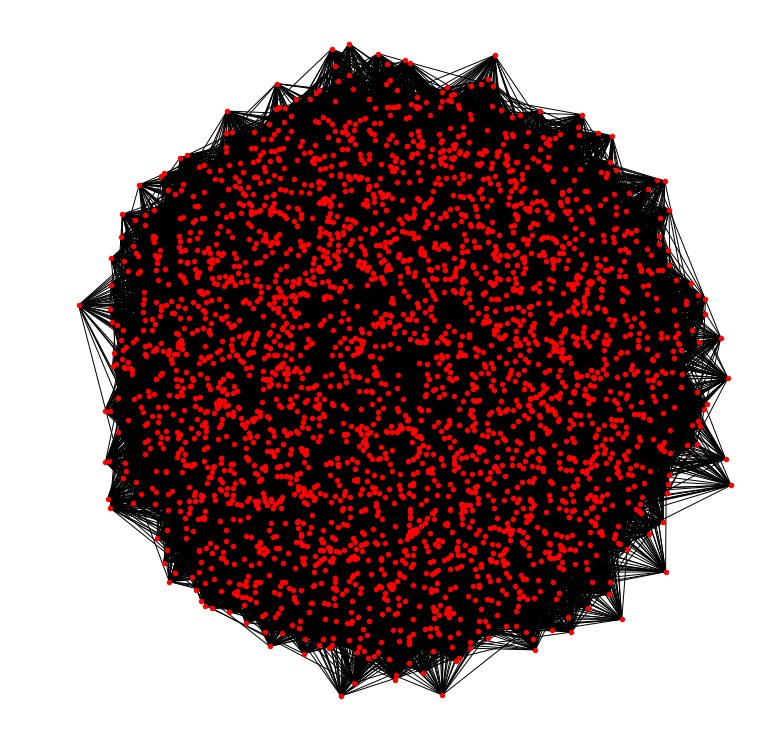

In [11]:
plt.figure(figsize=(10,10))
nx.draw(G,node_size = 20,with_labels = False)
plt.show()

<h2>Conclusion<h2>